## EDA for Nobel Prize and US Judge Ratings datasets

In [362]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pandas import Series, DataFrame
import pandas as pd
plt.rc('figure', figsize=(10, 6))
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Cleaning the scraped Nobel Prize dataset

The first part of this exercise consists of finding and eliminating dirty data in the Nobel Prize dataset. The final aim is to have a cleaned dataset that is ready to be explored by EDA.
The following points are considered:  
a) the first Nobel was awarded in 1901  
b) replace empty strings, i.e. <tt>''</tt>, with <tt>NaN</tt>  
c) some names are marked with an asterisk, denoting that these winners are recorded by country of birth, not country at the time of winning the prize. Clean up those names by removing the asterisks and strip any remaining whitespace. Generate a flag variable that equals 1 if the country is the country of birth  
d) some names are duplicated. This could indicate that some people have won the Nobel Prize more than once. However, it could also be that a winner is "claimed" by more than one country. Remove all real duplicates. For instance, Marie Curie is contained 4 times: twice for Poland and twice for France: remove 2 of them
e) consider the missing values in the field <font color='blue'>category</font>. Are they really missing or just entry mistakes?
f) is there an explanation of the missing values of the field <font color='blue'>gender</font>? Remove all rows without gender  
g) what about missing values for <font color='blue'>date_of_birth</font>?  
h) convert the <font color='blue'>date_of_birth</font> into a Numpy <tt>datetime64</tt> object. You may replace incorrect dates, e.g. 'None', by <tt>NaN</tt>. Determine the winners' ages by subtracting the prize <font color='blue'>year</font> from <font color='blue'>date_of_birth</font>

In [363]:
df=pd.read_json(open('nobel_winners.json'))

<b> a) Awards registered after 1901 (year >= 1901)

In [364]:
df = df[df.year >= 1901]

#Validation statement 
print("Log: Awards registered after 1901 = ", len(df))

Log: Awards registered after 1901 =  1049


<b> b) Replace empty string with NaN

In [365]:
df.replace(r'^$', np.NAN, regex=True, inplace=True)

<b> c) 1. Generate a flag variable that equals 1 if the country is the country of birth AND 2. Remove asterisks and strip remaining whitespace

In [366]:
li = df.name[df.name.str.find("*") != -1] 
print ("Log: Records to be cleaned = ", len(li))

if 'country_birth' not in df.columns:
    df['country_birth'] = np.where(df.name.str.find("*") != -1, 1, 0) # Make new flag column 
    print ("Log: Column 'country_birth' generated")
    

df['name'] = df.name.str.replace(r'(\s*\*\s*)', '')  # Remove symbol from name

Log: Records to be cleaned =  142
Log: Column 'country_birth' generated


<b> d) 1. Order records alphabetically by country and 2. Remove all duplicates (same name and year) except the first occurrence

In [367]:
#order by country alfabetically 
df.sort_values('country', axis=0, inplace=True)
print("Log: Occurrences for 'Aaron Klug' before:")
print(df.country[df.name == "Aaron Klug"])

#remove all occurancies except the first one
df.drop_duplicates(subset=['name', 'year'], keep='first', inplace=True)
print("\nLog: Occurrences for 'Aaron Klug' after:")
print(df.country[df.name == "Aaron Klug"])

Log: Occurrences for 'Aaron Klug' before:
121      South Africa
131    United Kingdom
106               NaN
Name: country, dtype: object

Log: Occurrences for 'Aaron Klug' after:
121    South Africa
Name: country, dtype: object


<b> e) The missing categories are entry mistakes due to the scraping technique. 

The caregories were filled based on hardcoded category names: "Physics", "Chemistry", "Physiology or Medicine", "Literature", "Peace" and "Economics". However, there are 5 records which don't follow the same pattern and contain variations of these categories, eg:
- "Economic Sciences" instead of "Economics"
- "Physiology of Medicine" and "Medicine" instead of "Physiology or Medicine"

In [368]:
df.text[df.category.isnull()]

922                       Alexis Carrel , Medicine, 1912
104    Andrew Schally *,  born in then Poland, now Li...
712    Andrew Schally *,  born in Wilno, Second Polis...
812    Hargobind Khorana *,  born in  Kabirwala , Bri...
815               Amartya Sen *, Economic Sciences, 1998
Name: text, dtype: object

<b> f) The records with missing gender are mostly organisations (institutes, agencies, etc). However for persons (eg, "Ragnar Granit") the gender info is really missing from the given source

Remove all rows without gender

In [369]:
g = df.text[df.gender.isnull()]
print("Log: Missing genders = ", len(g))
g

#remove all rows without gender
df = df[df.gender.notnull()]

Log: Missing genders =  8


1033     International Atomic Energy Agency , Peace, 2005
3           Institut de Droit International , Peace, 1904
1000    Pugwash Conferences on Science and World Affai...
947                Médecins Sans Frontières , Peace, 1999
650     Ragnar Granit ,  born in then Russian Empire, ...
574                   Amnesty International , Peace, 1977
156                 Friends Service Council , Peace, 1947
267     American Friends Service Committee  (The Quake...
Name: text, dtype: object

<b> g) Same situation: The records with missing values for date_of_birth are mostly organisations (institutes, agencies, etc). However for persons (eg, "Hiroshi Amano") the date_of_birth info is really missing from the given source

In [370]:
d = df.text[df.date_of_birth.isnull()]
print("Log: Missing date of birth = ", len(d))
d

Log: Missing date of birth =  1


782    Hiroshi Amano , Physics, 2014
Name: text, dtype: object

<b> h) 
1. Convert the date_of_birth into a Numpy datetime64 object
2. Replace incorrect dates, e.g. 'None', by NaN
3. Determine the winners' ages by subtracting the prize year from date_of_birth

In [371]:
#convert the date_of_birth into a Numpy datetime64 object
df.date_of_birth = [pd.to_datetime(date) for date in df.date_of_birth]
#generate new column to determine the winners' age
df['age'] = df.year - df.date_of_birth.dt.year

print("Log: Records with missing date_of_birth: ")
df.text[df.date_of_birth.isnull()]
df

Log: Records with missing date_of_birth: 


782    Hiroshi Amano , Physics, 2014
Name: text, dtype: object

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,country_birth,age
0,NaN,Physiology or Medicine,Argentina,1927-10-08,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984,0,57.0
1049,NaN,Physiology or Medicine,Argentina,1887-04-10,1971-09-21,male,http://en.wikipedia.org/wiki/Bernardo_Houssay,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina","Bernardo Houssay , Physiology or Medicine, 1947",1947,0,60.0
1048,NaN,Peace,Argentina,1878-11-01,"May 5, 1959",male,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina","Carlos Saavedra Lamas , Peace, 1936",1936,0,58.0
1050,NaN,Chemistry,Argentina,1906-09-06,1987-12-2,male,http://en.wikipedia.org/wiki/Luis_Federico_Leloir,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina","Luis Federico Leloir , Chemistry, 1970",1970,0,64.0
1051,NaN,Peace,Argentina,1931-11-26,NaN,male,http://en.wikipedia.org/wiki/Adolfo_P%C3%A9rez...,Adolfo Pérez Esquivel,Buenos Aires,NaN,"Adolfo Pérez Esquivel , Peace, 1980",1980,0,49.0
1040,NaN,Literature,Australia,1912-05-28,30 September 1990,male,http://en.wikipedia.org/wiki/Patrick_White,Patrick White,"Knightsbridge , London","Sydney, Australia","Patrick White , born in the United Kingdom , ...",1973,0,61.0
1038,NaN,Physiology or Medicine,Australia,1903-01-27,2 May 1997,male,http://en.wikipedia.org/wiki/John_Carew_Eccles,John Carew Eccles,"Melbourne , Australia","Tenero-Contra , Switzerland","John Carew Eccles , Physiology or Medicine, 1963",1963,0,60.0
1042,NaN,Economics,Australia,1920-05-29,"August 9, 2000",male,http://en.wikipedia.org/wiki/John_Harsanyi,John Harsanyi,"Budapest , Hungary","Berkeley, California , USA","John Harsanyi , Economics, 1994",1994,0,74.0
1043,NaN,Physiology or Medicine,Australia,1940-10-15,NaN,male,http://en.wikipedia.org/wiki/Peter_C._Doherty,Peter C. Doherty & Professor Rolf Zinkernagel,Brisbane,NaN,Peter C. Doherty & Professor Rolf Zinkernage...,1996,0,56.0
1044,NaN,Physiology or Medicine,Australia,1937-06-11,NaN,male,http://en.wikipedia.org/wiki/Robin_Warren,J. Robin Warren,"Adelaide , Australia",NaN,"J. Robin Warren , Physiology or Medicine, 2005",2005,0,68.0


### Apply PCA on the US Judge Ratings

In the file <tt>JudgeRatings.csv</tt>, you can find the information about Lawyers' ratings of state judges in the US Superior Court. The file contains 43 observations on 12 numeric variables.
- CONT 	Number of contacts of lawyer with judge.
- INTG 	Judicial integrity.
- DMNR 	Demeanor.
- DILG 	Diligence.
- CFMG 	Case flow managing.
- DECI 	Prompt decisions.
- PREP 	Preparation for trial.
- FAMI 	Familiarity with law.
- ORAL 	Sound oral rulings.
- WRIT 	Sound written rulings.
- PHYS 	Physical ability.
- RTEN 	Worthy of retention.

Apply PCA to the 12 components after standardizing. Determine how many components to use based on:
 - Eigenvalue Criterion
 - Proportion of Variance Explained Criterion (use a minimum of 90% variability)
 - Scree Plot Criterion
 - Communality  


In [372]:
from scipy.stats import zscore
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
from scipy.stats import zscore
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df1=pd.read_csv('JudgeRatings.csv')
df1.columns    # show columns
names=['CONT', 'INTG', 'DMNR', 'DILG', 'CFMG', 'DECI', 'PREP', 'FAMI','ORAL', 'WRIT', 'PHYS', 'RTEN']
dff = df1.drop('JUDGE', 1)

Index(['JUDGE', 'CONT', 'INTG', 'DMNR', 'DILG', 'CFMG', 'DECI', 'PREP', 'FAMI',
       'ORAL', 'WRIT', 'PHYS', 'RTEN'],
      dtype='object')

#### Standardize AND Apply PCA 

In [373]:
dff['CONT_z']=zscore(dff.CONT,ddof=1)
dff['INTG_z']=zscore(dff.INTG,ddof=1)
dff['DMNR_z']=zscore(dff.DMNR,ddof=1)
dff['DILG_z']=zscore(dff.DILG,ddof=1)
dff['CFMG_z']=zscore(dff.CFMG,ddof=1)
dff['DECI_z']=zscore(dff.DECI,ddof=1)
dff['PREP_z']=zscore(dff.PREP,ddof=1)
dff['FAMI_z']=zscore(dff.FAMI,ddof=1)
dff['ORAL_z']=zscore(dff.ORAL,ddof=1)
dff['WRIT_z']=zscore(dff.WRIT,ddof=1)
dff['PHYS_z']=zscore(dff.PHYS,ddof=1)
dff['RTEN_z']=zscore(dff.RTEN,ddof=1)
names=['CONT_z','INTG_z','DMNR_z','DILG_z','CFMG_z','DECI_z','PREP_z','FAMI_z','ORAL_z','WRIT_z','PHYS_z','RTEN_z']
data=dff[names]
#train=data.sample(frac=0.9,random_state=20)
#test=data.drop(train.index)
#print ("Log: Train data = ", len(train))
#print ("Log: Test data = ", len(test))

<b>- Matrix plot of the predictor variables 

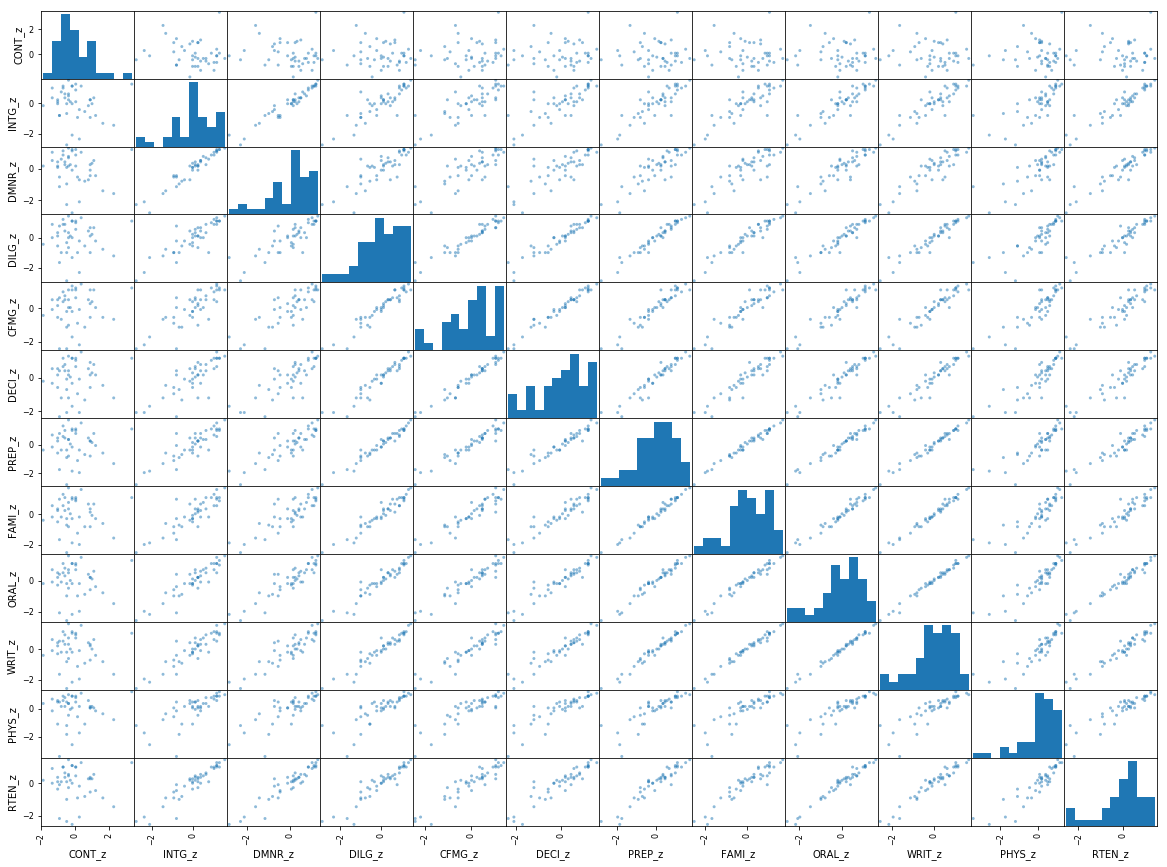

In [374]:
pd.plotting.scatter_matrix(data, alpha=0.5,figsize=(20,15));

<b>- Correlation matrix

In [375]:
data.corr().round(3)

,CONT_z,INTG_z,DMNR_z,DILG_z,CFMG_z,DECI_z,PREP_z,FAMI_z,ORAL_z,WRIT_z,PHYS_z,RTEN_z
CONT_z,1.000,-0.133,-0.154,0.012,0.137,0.087,0.011,-0.026,-0.012,-0.044,0.054,-0.034
INTG_z,-0.133,1.000,0.965,0.872,0.814,0.803,0.878,0.869,0.911,0.909,0.742,0.937
DMNR_z,-0.154,0.965,1.000,0.837,0.813,0.804,0.856,0.841,0.907,0.893,0.789,0.944
DILG_z,0.012,0.872,0.837,1.000,0.959,0.956,0.979,0.957,0.954,0.959,0.813,0.930
CFMG_z,0.137,0.814,0.813,0.959,1.000,0.981,0.958,0.935,0.951,0.942,0.879,0.927
DECI_z,0.087,0.803,0.804,0.956,0.981,1.000,0.957,0.943,0.948,0.946,0.872,0.925
PREP_z,0.011,0.878,0.856,0.979,0.958,0.957,1.000,0.990,0.983,0.987,0.849,0.950
FAMI_z,-0.026,0.869,0.841,0.957,0.935,0.943,0.990,1.000,0.981,0.991,0.844,0.942
ORAL_z,-0.012,0.911,0.907,0.954,0.951,0.948,0.983,0.981,1.000,0.993,0.891,0.982
WRIT_z,-0.044,0.909,0.893,0.959,0.942,0.946,0.987,0.991,0.993,1.000,0.856,0.968


<b>- Apply PCA

In [376]:
pca1 = PCA()
pca1.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<b>- Component matrix

In [377]:
weigths = np.dot(np.diag(np.sqrt(pca1.explained_variance_)), pca1.components_).T
component = DataFrame(weigths, index=names, columns=np.arange(pca1.n_components_) +1)
component.round(3)

print('Log: Component weights should be >= 0.50 to be considered significant')
component[np.abs(component) >= 0.50].fillna(' ')

,1,2,3,4,5,6,7,8,9,10,11,12
CONT_z,0.010,0.980,-0.193,0.030,-0.027,-0.001,0.001,-0.007,0.002,0.002,0.001,-0.000
INTG_z,-0.919,-0.191,-0.317,0.088,0.004,0.071,-0.063,0.041,0.024,-0.008,-0.006,0.000
DMNR_z,-0.913,-0.208,-0.321,-0.063,0.067,-0.076,0.065,-0.031,0.018,0.005,0.008,0.003
DILG_z,-0.969,0.038,0.094,0.162,0.088,0.116,0.029,-0.044,-0.004,0.029,0.004,0.002
CFMG_z,-0.963,0.177,0.120,0.007,0.130,-0.017,0.035,0.089,-0.013,-0.007,0.009,0.001
DECI_z,-0.961,0.134,0.172,0.015,0.123,-0.076,-0.075,-0.038,0.023,-0.005,-0.007,0.002
PREP_z,-0.985,0.034,0.088,0.108,-0.059,0.016,0.047,-0.019,0.010,-0.051,-0.018,-0.012
FAMI_z,-0.976,-0.001,0.113,0.101,-0.147,-0.020,-0.005,0.003,0.020,-0.003,0.033,0.019
ORAL_z,-0.995,-0.004,0.001,-0.004,-0.072,-0.029,0.008,0.011,-0.027,0.019,-0.036,0.022
WRIT_z,-0.990,-0.033,0.032,0.069,-0.089,-0.046,-0.009,0.016,-0.002,0.036,0.000,-0.032


Log: Component weights should be >= 0.50 to be considered significant


,1,2,3,4,5,6,7,8,9,10,11,12
CONT_z,,0.980267,,,,,,,,,,
INTG_z,-0.918548,,,,,,,,,,,
DMNR_z,-0.913243,,,,,,,,,,,
DILG_z,-0.968855,,,,,,,,,,,
CFMG_z,-0.963185,,,,,,,,,,,
DECI_z,-0.961018,,,,,,,,,,,
PREP_z,-0.984939,,,,,,,,,,,
FAMI_z,-0.976258,,,,,,,,,,,
ORAL_z,-0.99545,,,,,,,,,,,
WRIT_z,-0.990206,,,,,,,,,,,


<b>- Eigenvalues

In [378]:
results=DataFrame({'Component':np.arange(pca1.n_components_)+1,'Total':pca1.explained_variance_,
                   '% of Var':pca1.explained_variance_ratio_*100,'Cum %':np.cumsum(pca1.explained_variance_ratio_*100)},
                 columns=['Component','Total','% of Var','Cum %'])
print(results.round(4).to_string(index=False))

Component    Total  % of Var     Cum %
        1  10.1335   84.4459   84.4459
        2   1.1041    9.2012   93.6471
        3   0.3329    2.7742   96.4213
        4   0.2538    2.1154   98.5367
        5   0.0845    0.7038   99.2404
        6   0.0373    0.3107   99.5512
        7   0.0197    0.1640   99.7152
        8   0.0154    0.1285   99.8436
        9   0.0078    0.0653   99.9089
       10   0.0056    0.0468   99.9557
       11   0.0033    0.0272   99.9828
       12   0.0021    0.0172  100.0000


<b> Eigenvalue Criterion => 2 components </b> - Keep the first and second principle components, where eigenvalues >1

In [379]:
results[results['Total'] > 1]

,Component,Total,% of Var,Cum %
0,1,10.133504,84.445864,84.445864
1,2,1.104147,9.201225,93.647089


<b> Proposition of Variance Explained Criterion => 2 components </b> - Keep 90% variablity, which means we select the first 2 principle components 

In [380]:
crit = max(results['Cum %'], key=lambda x:x >= 90)
results[results['Cum %'] <= crit]

#OR
#results[results['% of Var'] > (100 / 12)]

,Component,Total,% of Var,Cum %
0,1,10.133504,84.445864,84.445864
1,2,1.104147,9.201225,93.647089


<b> Minimum Comunality Criterion => 2 components</b> - Based on the overall importance of each particular variable in the PCA, we can conclude that: 
- Taking only the first principal component, there is still a lot of variante to be accounted for for CONT_z variable (small communality value for CONT_z = 0.0001 <0.5)
- Taking the first and the second principal components, the PCA covers an acceptable large portion of the variability of the variables => Consider 2 components

In [381]:
print("Proportion of variance of a particular variable that is shared with other variables, based on 1 component")
print ("For CONT_z: ", np.square(weigths[0,0:1]).sum())
print ("For INTG_z: ", np.square(weigths[1,0:1]).sum())
print ("For DMNR_z: ", np.square(weigths[2,0:1]).sum())
print ("For DILG_z: ", np.square(weigths[3,0:1]).sum())
print ("For CFMG_z: ", np.square(weigths[4,0:1]).sum())
print ("For DECI_z: ", np.square(weigths[5,0:1]).sum())
print ("For PREP_z: ", np.square(weigths[6,0:1]).sum())
print ("For FAMI_z: ", np.square(weigths[7,0:1]).sum())
print ("For ORAL_z: ", np.square(weigths[8,0:1]).sum())
print ("For WRIT_z: ", np.square(weigths[9,0:1]).sum())
print ("For PHYS_z: ", np.square(weigths[10,0:1]).sum())
print ("For RTEN_z: ", np.square(weigths[11,0:1]).sum())


print("\nProportion of variance of a particular variable that is shared with other variables, based on 2 components")
print ("For CONT_z: ", np.square(weigths[0,0:2]).sum())
print ("For INTG_z: ", np.square(weigths[1,0:2]).sum())
print ("For DMNR_z: ", np.square(weigths[2,0:2]).sum())
print ("For DILG_z: ", np.square(weigths[3,0:2]).sum())
print ("For CFMG_z: ", np.square(weigths[4,0:2]).sum())
print ("For DECI_z: ", np.square(weigths[5,0:2]).sum())
print ("For PREP_z: ", np.square(weigths[6,0:2]).sum())
print ("For FAMI_z: ", np.square(weigths[7,0:2]).sum())
print ("For ORAL_z: ", np.square(weigths[8,0:2]).sum())
print ("For WRIT_z: ", np.square(weigths[9,0:2]).sum())
print ("For PHYS_z: ", np.square(weigths[10,0:2]).sum())
print ("For RTEN_z: ", np.square(weigths[11,0:2]).sum())

Proportion of variance of a particular variable that is shared with other variables, based on 1 component
For CONT_z:  9.58275429957e-05
For INTG_z:  0.84373122595
For DMNR_z:  0.834013174504
For DILG_z:  0.938680766775
For CFMG_z:  0.927724888441
For DECI_z:  0.923554971065
For PREP_z:  0.970104116173
For FAMI_z:  0.953079656732
For ORAL_z:  0.990919970969
For WRIT_z:  0.980508594107
For PHYS_z:  0.798578394414
For RTEN_z:  0.972512139685

Proportion of variance of a particular variable that is shared with other variables, based on 2 components
For CONT_z:  0.961018330336
For INTG_z:  0.880321467848
For DMNR_z:  0.877110485342
For DILG_z:  0.940136064341
For CFMG_z:  0.959034498218
For DECI_z:  0.941610648906
For PREP_z:  0.971251091786
For FAMI_z:  0.953081566581
For ORAL_z:  0.990934485915
For WRIT_z:  0.981595766283
For PHYS_z:  0.807331753395
For RTEN_z:  0.974224547188


<b> Scree Plot Criterion => 2 components </b> - Keep the first and second principle components, as they are represented before the bend in the "elbow" (in the graph of the eigenvalues against the component number plotted below)

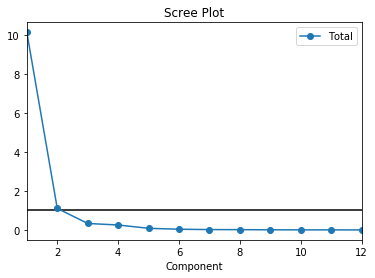

In [382]:
results.plot(x='Component', y='Total',marker='o',title='Scree Plot');
plt.hlines(1,1,pca1.n_components_);

Interpretation of the first 2 principle components.
- CONT Number of contacts of lawyer with judge.
- INTG Judicial integrity.
- DMNR Demeanor.
- DILG Diligence.
- CFMG Case flow managing.
- DECI Prompt decisions.
- PREP Preparation for trial.
- FAMI Familiarity with law.
- ORAL Sound oral rulings.
- WRIT Sound written rulings.
- PHYS Physical ability.
- RTEN Worthy of retention </b>

Principal Component I
- Consists of 11 variables
- Negative correlation for all variables 
- This component alone explains 84% of the total variability
- Large values for all 11 variables 
- The group of 11 variables represents the skill set evaluated for the judges

Principal Component II
- Consists of one variable: CONT (Number of contacts of lawyer with judge)
- Positive correlation for this variable
- Explains 9% of the total variability
- Component that shows the number of lawyers-judge contacts

- Together, the first and second components explain 93% of the total variablity